In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
country_wise = pd.read_csv('country_wise_latest.csv')

country_wise.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [22]:
country_wise[country_wise['Country/Region'].str.contains('India')]

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
79,India,1480073,33408,951166,495499,44457,637,33598,2.26,64.26,3.51,1155338,324735,28.11,South-East Asia


In [23]:


# country_with_highest_confirmed = country_wise.loc[country_wise['Confirmed'].idxmax()]['Country/Region']
# country_with_highest_confirmed

# country_with_minimum_confirmed = country_wise.loc[country_wise['Confirmed'].idxmin()]['Country/Region']
# country_with_minimum_confirmed

#Top 5 confirmed values
sorted_val = country_wise.sort_values(by='Confirmed', ascending=False)
sorted_val.iloc[:5][['Country/Region', 'Confirmed']]


,Country/Region,Confirmed
173,US,4290259
23,Brazil,2442375
79,India,1480073
138,Russia,816680
154,South Africa,452529


In [24]:
#Highest recovery
High_rec = country_wise.loc[country_wise['Recovered'].idxmax()]['Country/Region']
High_rec

#Top Five country with high recovery
sorted_val_rec = country_wise.sort_values(['Recovered'] , ascending=False)
sorted_val_rec.iloc[:5][['Country/Region' , 'Recovered']].reset_index()

,index,Country/Region,Recovered
0,23,Brazil,1846641
1,173,US,1325804
2,79,India,951166
3,138,Russia,602249
4,35,Chile,319954


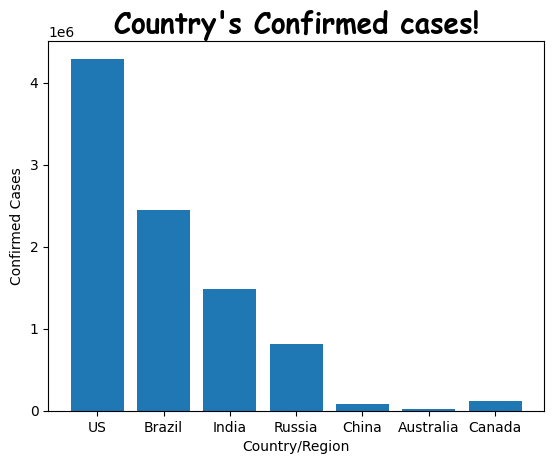

In [25]:
country = ['US' , 'Brazil' , 'India' , 'Russia' , 'China' , 'Australia' , 'Canada']
label = ['US' , 'Brazil' , 'IND' , 'RUS' , 'China' , 'AUS' , 'CND']
usa = int(country_wise.loc[country_wise['Country/Region'] == 'US']['Confirmed'].values[0])
brazil = int(country_wise.loc[country_wise['Country/Region'] == 'Brazil']['Confirmed'].values[0])
india = int(country_wise.loc[country_wise['Country/Region'] == 'India']['Confirmed'].values[0])
russia = int(country_wise.loc[country_wise['Country/Region'] == 'Russia']['Confirmed'].values[0])
china = int(country_wise.loc[country_wise['Country/Region'] == 'China']['Confirmed'].values[0])
aus = int(country_wise.loc[country_wise['Country/Region'] == 'Australia']['Confirmed'].values[0])
canada = int(country_wise.loc[country_wise['Country/Region'] == 'Canada']['Confirmed'].values[0])

country_confirmed = []
for c in country:
    if c in country:
        country_confirmed.append(int(country_wise.loc[country_wise['Country/Region'] == c]['Confirmed'].values[0]))

confirmed = [usa , brazil , india , russia , china , aus , canada]

plt.bar(country , confirmed , label=label)
plt.xlabel('Country/Region')
plt.ylabel('Confirmed Cases')
plt.title('Country\'s Confirmed cases!' , fontdict={'fontweight' : 'bold' , 'fontsize' : 20 , 'fontname' : 'comic sans ms'})

plt.show()

In [26]:
country_wise.iloc[: , :4]

,Country/Region,Confirmed,Deaths,Recovered
0,Afghanistan,36263,1269,25198
1,Albania,4880,144,2745
2,Algeria,27973,1163,18837
3,Andorra,907,52,803
4,Angola,950,41,242
...,...,...,...,...
182,West Bank and Gaza,10621,78,3752
183,Western Sahara,10,1,8
184,Yemen,1691,483,833
185,Zambia,4552,140,2815


In [27]:
country_wise.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


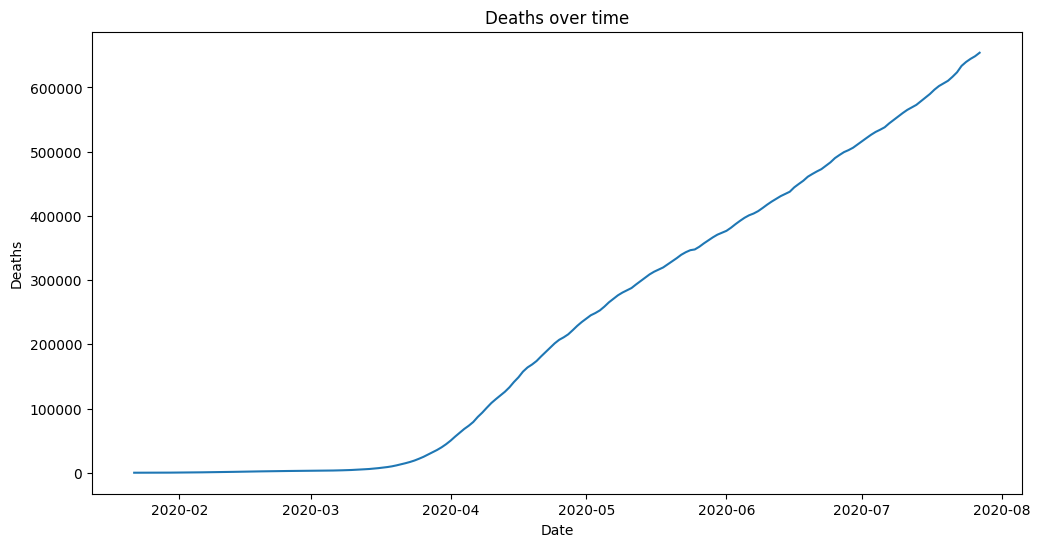

In [28]:
day_wise = pd.read_csv('day_wise.csv')

# day_wise.head()

day_wise['Date'] = pd.to_datetime(day_wise['Date'])

plt.figure(figsize=(12,6))
plt.plot(day_wise['Date'] , day_wise['Deaths'])
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.title('Deaths over time')
plt.show()

In [36]:
country_wise[country_wise['Deaths / 100 Recovered'].idxmax()]

KeyError: "None of [Index([32], dtype='int64')] are in the [columns]"